<a href="https://colab.research.google.com/github/SPraveen69/Data_Model/blob/main/Synptoms_count_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import the Lib**

In [47]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from datetime import datetime, timedelta
import matplotlib.dates as mdates

### **Uploading the Dataset**

In [48]:
# Mount Google Drive
drive.mount('/content/drive')

# Set the path to the CSV file in your Google Drive
file_path = '/content/drive/MyDrive/BDX Dataset/MedicalEditedMonth.xlsx'

# Load the CSV file into a DataFrame
data = pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Data Preprocessing**

In [49]:
# # Set the path to the Excel file
# file_path = '/content/sample_data/medical center deitailes.xlsx'

# # Read the Excel file
# data = pd.read_excel(file_path)

In [50]:
data.shape

(435, 49)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         435 non-null    object        
 1   EPF No                       414 non-null    float64       
 2   Time                         0 non-null      float64       
 3   Employee No                  366 non-null    float64       
 4   Name With Initials           435 non-null    object        
 5   Calling Name                 435 non-null    object        
 6   Department                   434 non-null    object        
 7   Roster                       366 non-null    object        
 8   Shift                        376 non-null    object        
 9   Symptoms                     415 non-null    object        
 10  Reporting Type               426 non-null    object        
 11  Treatments                   22 non-null     

In [52]:
# replace unwanted values with nan
# data = data.replace('#DIV/0!', np.nan)

# returns the total number of missing values for each column
data.isnull().sum()

,0
Date,0
EPF No,21
Time,435
Employee No,69
Name With Initials,0
Calling Name,0
Department,1
Roster,69
Shift,59
Symptoms,20


In [53]:
data

,Date,EPF No,Time,Employee No,Name With Initials,Calling Name,Department,Roster,Shift,Symptoms,...,Eno,Complain,Communicable Diseases,Hospital Stay/ Home Stay,Return to work Date,Plant,Contact Number,ID,Item Type,Path
0,26/07/2024 11:18,26813.0,NaN,1008008.0,Y.M.W.G.Mallika,Mallika,Manufacturing,Team G - Shift B,B,body Pain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000,Item,sites/BEKTMedicalCenter/Lists/Patient_Details_...
1,26/07/2024 11:18,NaN,NaN,NaN,Sujeewa,Sujeewa,Third party,NaN,NaN,Back Pain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10001,Item,sites/BEKTMedicalCenter/Lists/Patient_Details_...
2,26/07/2024 14:08,28616.0,NaN,1045160.0,W.D.ASHOKAMALA,Dilhani,Manufacturing,Team 11 - Shift A,A,Eye Pain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10002,Item,sites/BEKTMedicalCenter/Lists/Patient_Details_...
3,26/07/2024 14:09,29057.0,NaN,1084133.0,H.M.C.D.Herath,Chamila,Manufacturing,Team 23 - Shift A,A,Cold,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10003,Item,sites/BEKTMedicalCenter/Lists/Patient_Details_...
4,26/07/2024 14:09,23185.0,NaN,98753.0,R.Jelastina,Jelastina,Manufacturing,Team 09 - Shift A,A,Cold,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10004,Item,sites/BEKTMedicalCenter/Lists/Patient_Details_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,16/08/2024 16:55,29453.0,NaN,1090658.0,B.M.S.U.Kumara,Sakila,Training School,Team 03 - Shift B,B,Loose Motion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10430,Item,sites/BEKTMedicalCenter/Lists/Patient_Details_...
431,16/08/2024 18:22,25903.0,NaN,999564.0,S.M.Gandi,Gandi,Manufacturing,Team 07 - Shift B,B,Cold,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10431,Item,sites/BEKTMedicalCenter/Lists/Patient_Details_...
432,16/08/2024 18:31,28822.0,NaN,1051311.0,A.A.R.ATHUGALA,Ayesha,Warehouse,Team 02 - Shift A,A,Headache,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10432,Item,sites/BEKTMedicalCenter/Lists/Patient_Details_...
433,16/08/2024 21:22,29496.0,NaN,NaN,Ruwani,Ruwani,Manufacturing,NaN,NaN,Cold,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10433,Item,sites/BEKTMedicalCenter/Lists/Patient_Details_...


In [54]:
#retrieve all columns of data
data.columns

Index(['Date', 'EPF No', 'Time', 'Employee No', 'Name With Initials',
       'Calling Name', 'Department', 'Roster', 'Shift', 'Symptoms',
       'Reporting Type', 'Treatments', 'Paracetamol', 'Vitamin B', 'Vitamin C',
       ' Digene Tablet', 'Crape Bandage', 'Samahan', 'Jeewani',
       'Bed Rest In time', 'Bed Rest Out time', 'Entered By', 'Hospital Visit',
       'Hospital Name', 'Date of Visit', 'Visited Nurse ', 'Remark', 'Reason',
       'Brandix Employee/Contractor', 'Created', 'Created By', 'Modified By',
       'Modified', 'Hospital Refer/ Sent Home', 'BP ', 'Pulse ', 'Temperature',
       'SpO2', 'Patient Type', 'Eno', 'Complain', 'Communicable Diseases',
       'Hospital Stay/ Home Stay', 'Return to work Date', 'Plant',
       'Contact Number', 'ID', 'Item Type', 'Path'],
      dtype='object')

In [55]:
# drop unwanted columns in data
columns = ['Date','EPF No','Department','Shift','Symptoms']
data = data[columns]

In [56]:
#remove all the null row values
data = data.dropna()
data

,Date,EPF No,Department,Shift,Symptoms
0,26/07/2024 11:18,26813.0,Manufacturing,B,body Pain
2,26/07/2024 14:08,28616.0,Manufacturing,A,Eye Pain
3,26/07/2024 14:09,29057.0,Manufacturing,A,Cold
4,26/07/2024 14:09,23185.0,Manufacturing,A,Cold
5,26/07/2024 14:10,23887.0,Manufacturing,A,Cold
...,...,...,...,...,...
429,16/08/2024 16:54,24294.0,Quality Assurance,B,Cold
430,16/08/2024 16:55,29453.0,Training School,B,Loose Motion
431,16/08/2024 18:22,25903.0,Manufacturing,B,Cold
432,16/08/2024 18:31,28822.0,Warehouse,A,Headache


In [57]:
# Ensure your date strings are in the correct format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y %H:%M', errors='coerce').dt.strftime('%d/%m/%Y')

# Convert back to datetime if needed
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')

In [58]:
# data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y %H:%M', errors='coerce').dt.date

In [59]:
data['Date']


,Date
0,2024-07-26
2,2024-07-26
3,2024-07-26
4,2024-07-26
5,2024-07-26
...,...
429,2024-08-16
430,2024-08-16
431,2024-08-16
432,2024-08-16


In [60]:
symptom_counts = data.groupby(['Date', 'Department']).size().reset_index(name='Symptom_Count')
symptom_counts


,Date,Department,Symptom_Count
0,2024-07-26,Cutting,1
1,2024-07-26,Direct,1
2,2024-07-26,Facility Management,1
3,2024-07-26,Finishing,4
4,2024-07-26,Manufacturing,8
...,...,...,...
107,2024-08-16,Finishing,5
108,2024-08-16,Manufacturing,6
109,2024-08-16,Quality Assurance,2
110,2024-08-16,Training School,2


In [61]:
symptom_counts_pivot = symptom_counts.pivot(index='Date', columns='Department', values='Symptom_Count').fillna(0)
symptom_counts_pivot

Department,Central Inspection Facility,Cutting,Direct,Facility Management,Finishing,Finishing & Packing,Good Transport,HR,Indirect,Industrial Engineering,...,Operations,Pilot Zone,Planning,Quality Assurance,RM Inspection,Technical,Training School,Training Scool,Warehouse,Works HR
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-26,0.0,1.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2024-07-27,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2024-07-28,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
2024-07-29,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
2024-08-01,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-08-02,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
2024-08-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
2024-08-04,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
2024-08-05,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0


In [62]:
departments = data['Department'].unique()
departments

array(['Manufacturing', 'Finishing', 'Direct', 'Cutting', 'Operations',
       'Warehouse', 'Facility Management', 'Planning', 'Pilot Zone',
       'Machine Maintenance', 'Indirect', 'Technical',
       'Finishing & Packing', 'Quality Assurance', 'Works HR',
       'Medical Centre', 'Industrial Engineering',
       'Central Inspection Facility', 'Training School', 'Good Transport',
       'HR', 'RM Inspection', 'Training Scool', 'Manufaturing'],
      dtype=object)

In [63]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA model for the 'Finance' department
finance_data = symptom_counts_pivot['Manufacturing'].astype(int)

# Fit the model
model = ARIMA(finance_data, order=(5, 1, 0))
model_fit = model.fit()

# Forecast for the next 5 days
forecast = model_fit.forecast(steps=5)
forecast = forecast.round()

# Display the forecast
print("Finance Department - Predicted Symptoms Count for 08-16 to 08-20:")
print(forecast)


Finance Department - Predicted Symptoms Count for 08-16 to 08-20:
18     7.0
19    10.0
20    12.0
21     7.0
22     7.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

In [64]:
# # Create an empty DataFrame to store forecast results
# forecast_results = pd.DataFrame()

# # Forecast for each department
# for dept in departments:
#     # Filter data for the current department
#     dept_data = symptom_counts_pivot[dept].astype(int)

#     # Fit the ARIMA model
#     model = ARIMA(dept_data, order=(5, 1, 0))
#     model_fit = model.fit()

#     # Forecast for the next 5 days
#     forecast = model_fit.forecast(steps=5)
#     forecast = forecast.round()

#     # Create a DataFrame for the forecast
#     future_dates = pd.date_range(start='2024-08-17', periods=5, freq='D')
#     forecast_df = pd.DataFrame({
#         'Date': future_dates,
#         'Department': dept,
#         'Forecasted Symptoms Count': forecast
#     })

#     # Append forecast to results
#     forecast_results = pd.concat([forecast_results, forecast_df], ignore_index=True)

# # Display the forecast results
# forecast_results

In [65]:
# dept_data = pd.DataFrame(dept_data)
# dept_data.reset_index(inplace=True)
# dept_data.set_index('Date', inplace=True)
# dept_data.index = pd.to_datetime(dept_data.index)

# forecast_series = pd.Series(forecast, index=future_dates, name='Symptoms Count')
# # Combine historical data and forecast data
# combined = pd.concat([finance_data, forecast_series])

# plt.figure(figsize=(10, 6))

# # Plot historical data
# plt.plot(finance_data.index, finance_data, label='Historical Data', marker='o')

# # Plot forecast data
# plt.plot(forecast_series.index, forecast, label='Forecasted Data', marker='o', linestyle='--')

# # Add a vertical line to indicate the start of forecast
# plt.axvline(x=finance_data.index[-1], color='r', linestyle='--', label='Forecast Start')

# # Format x-axis as dates
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# plt.legend()
# plt.title('Manufacturing Department - Symptoms Count Forecast')
# plt.xlabel('Date')
# plt.ylabel('Symptoms Count')
# plt.grid(True)
# plt.show()

# # Display the forecast
# print("Manufacturing Department - Predicted Symptoms Count for 08-15 to 08-19:")
# print(forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

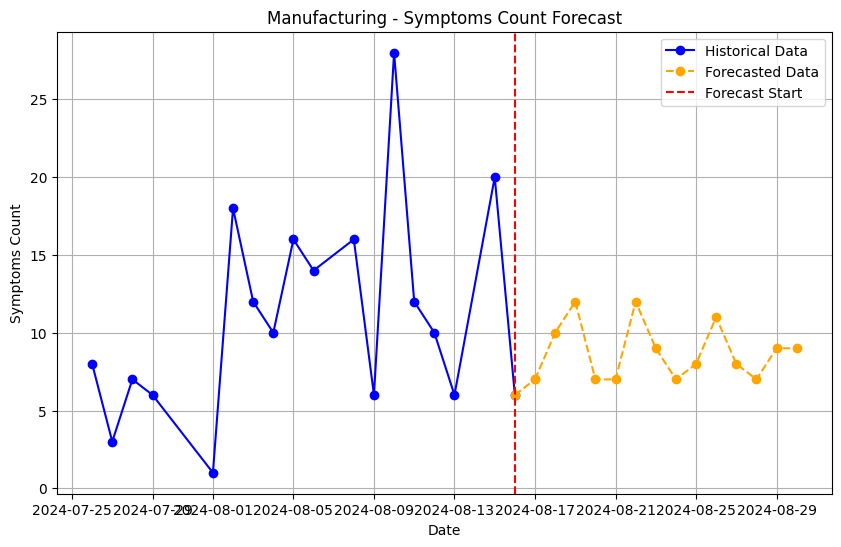

Manufacturing - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:
18     7.0
19    10.0
20    12.0
21     7.0
22     7.0
23    12.0
24     9.0
25     7.0
26     8.0
27    11.0
28     8.0
29     7.0
30     9.0
31     9.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

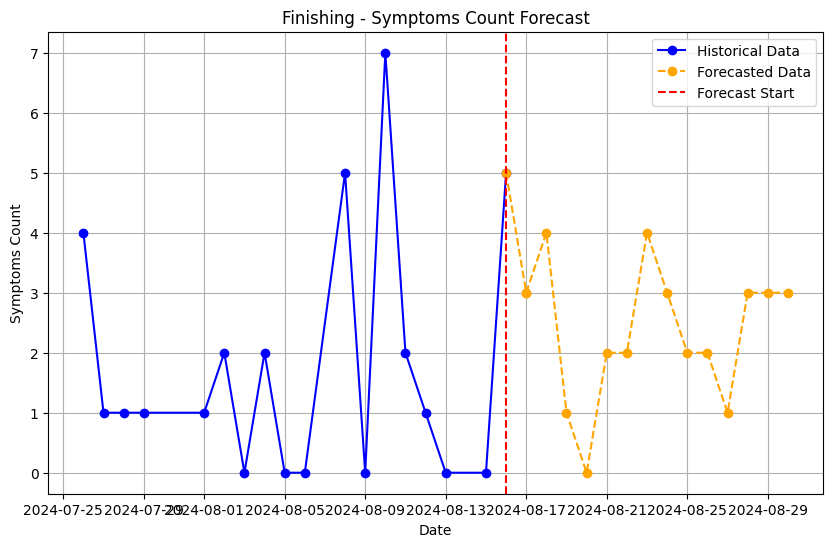

Finishing - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:
18    3.0
19    4.0
20    1.0
21    0.0
22    2.0
23    2.0
24    4.0
25    3.0
26    2.0
27    2.0
28    1.0
29    3.0
30    3.0
31    3.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

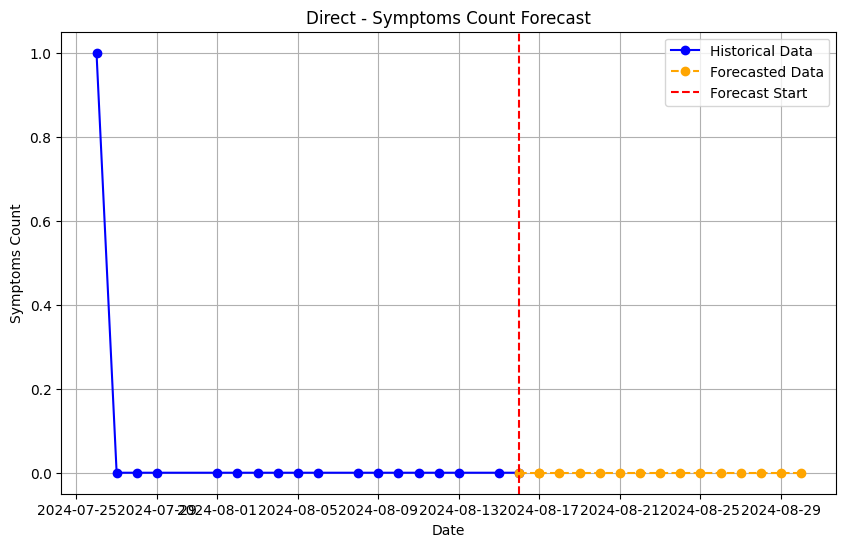

Direct - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

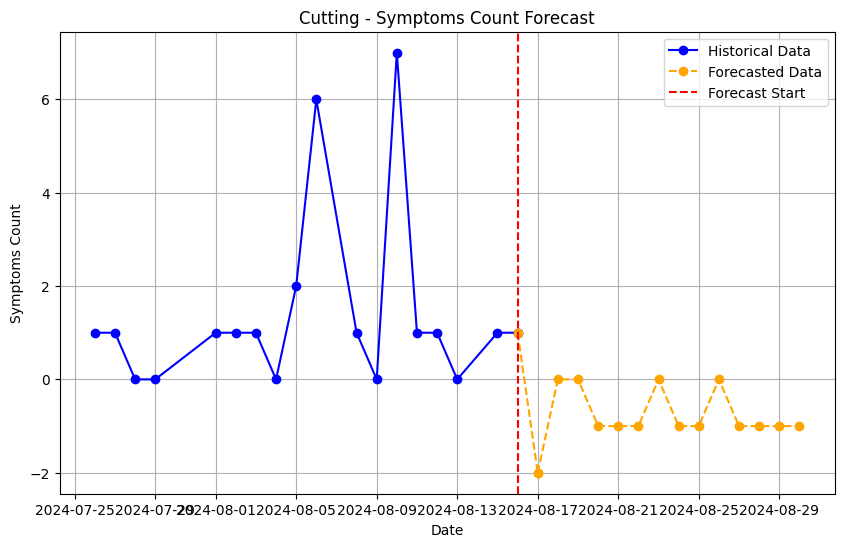

Cutting - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:
18   -2.0
19    0.0
20    0.0
21   -1.0
22   -1.0
23   -1.0
24   -0.0
25   -1.0
26   -1.0
27   -0.0
28   -1.0
29   -1.0
30   -1.0
31   -1.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

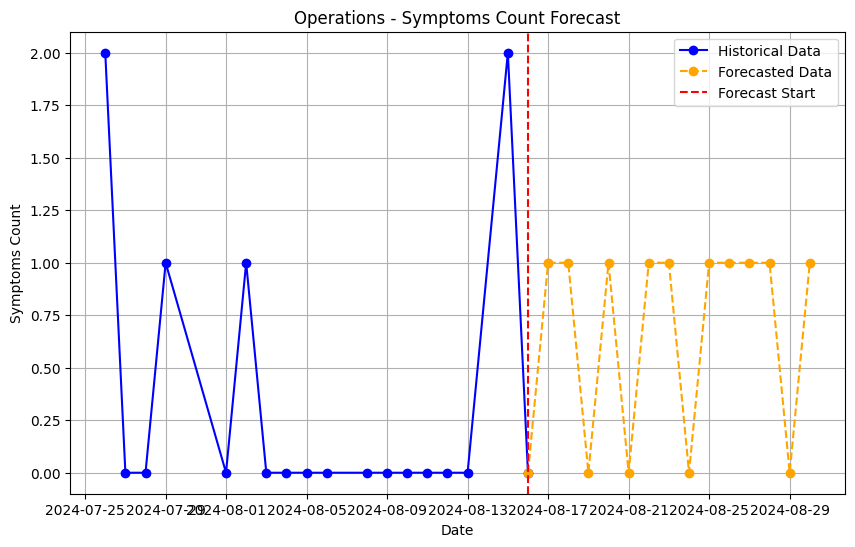

Operations - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:
18    1.0
19    1.0
20    0.0
21    1.0
22    0.0
23    1.0
24    1.0
25    0.0
26    1.0
27    1.0
28    1.0
29    1.0
30    0.0
31    1.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

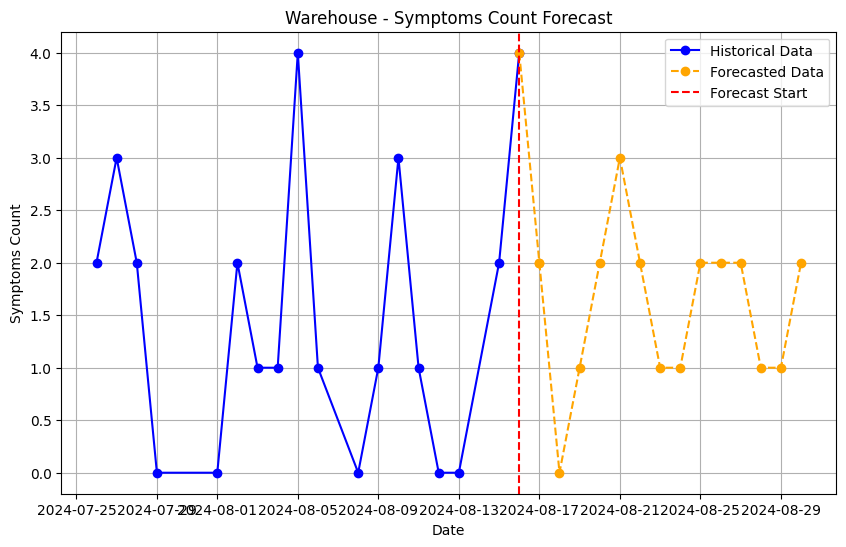

Warehouse - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:
18    2.0
19   -0.0
20    1.0
21    2.0
22    3.0
23    2.0
24    1.0
25    1.0
26    2.0
27    2.0
28    2.0
29    1.0
30    1.0
31    2.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

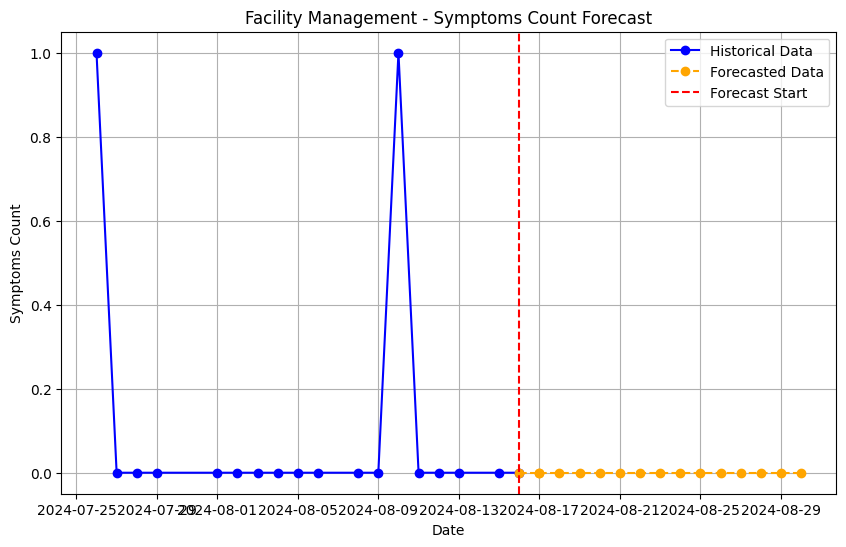

Facility Management - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

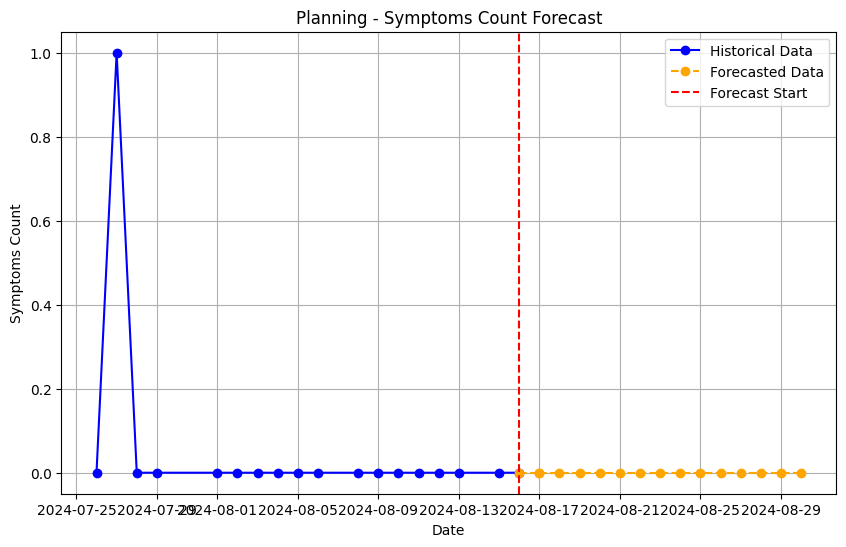

Planning - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

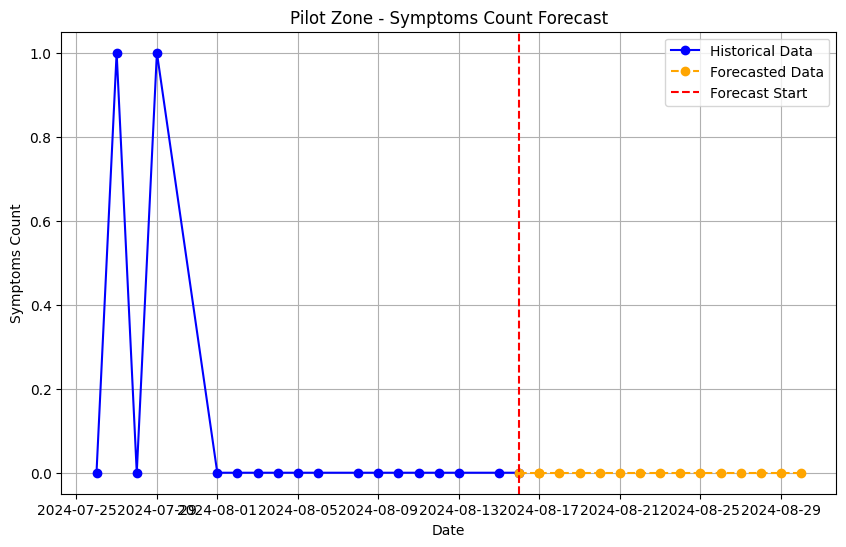

Pilot Zone - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

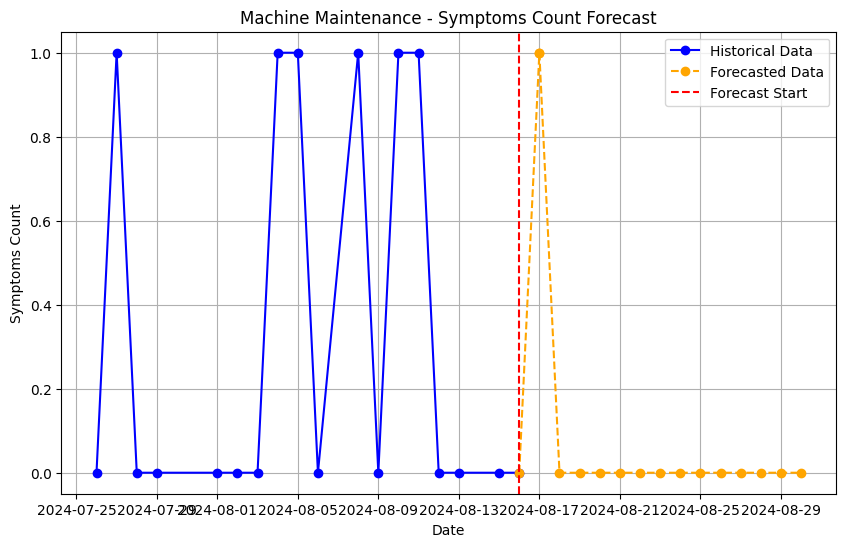

Machine Maintenance - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:
18    1.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

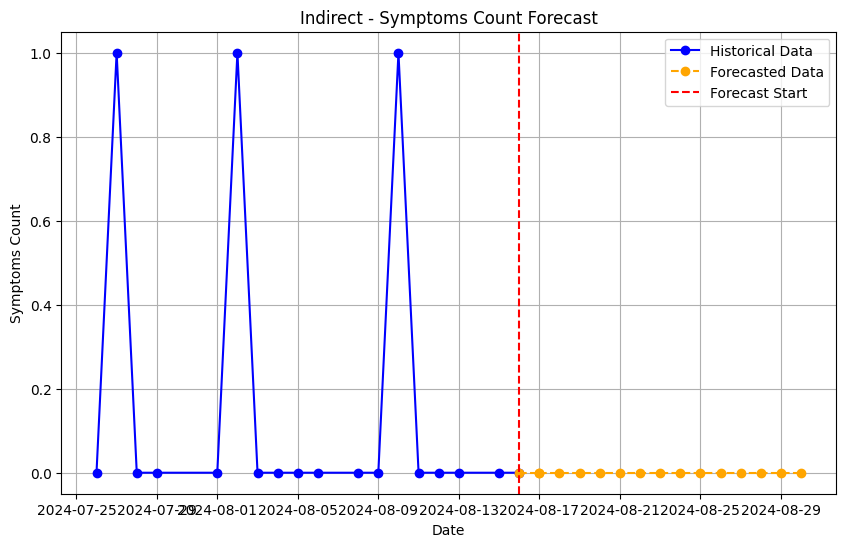

Indirect - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

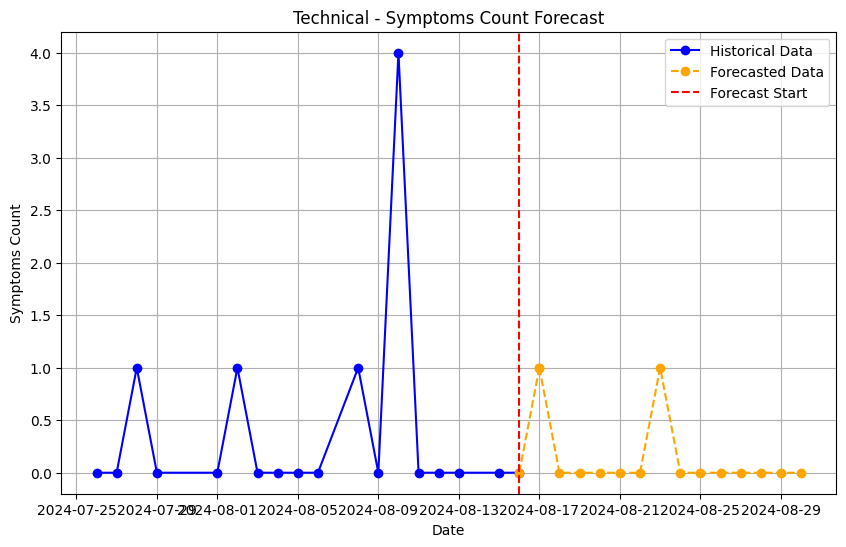

Technical - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:
18    1.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    1.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

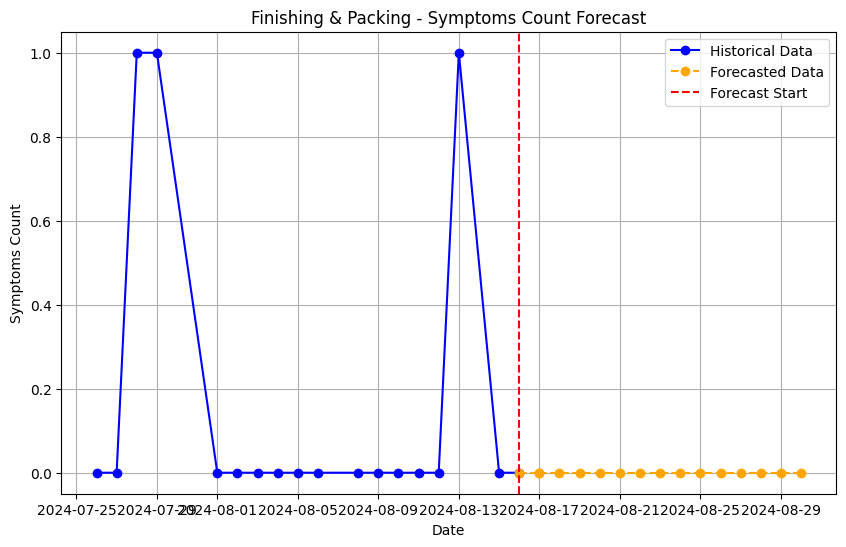

Finishing & Packing - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

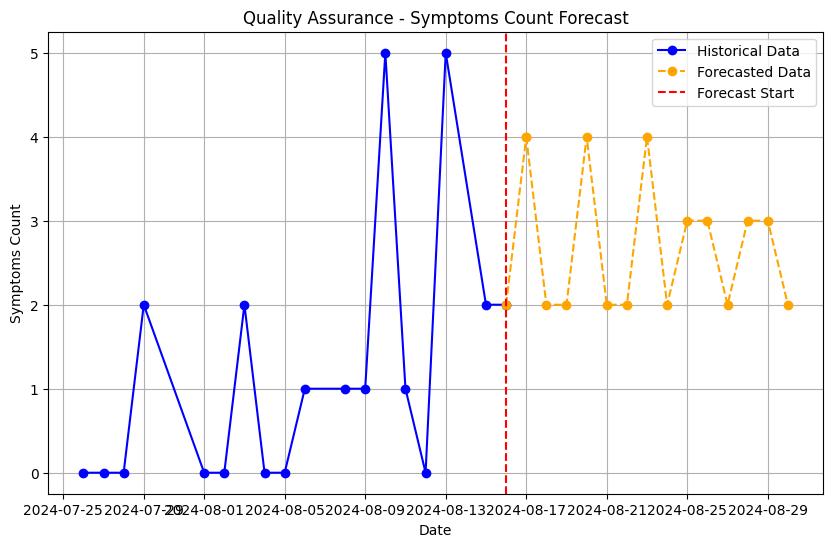

Quality Assurance - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:
18    4.0
19    2.0
20    2.0
21    4.0
22    2.0
23    2.0
24    4.0
25    2.0
26    3.0
27    3.0
28    2.0
29    3.0
30    3.0
31    2.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

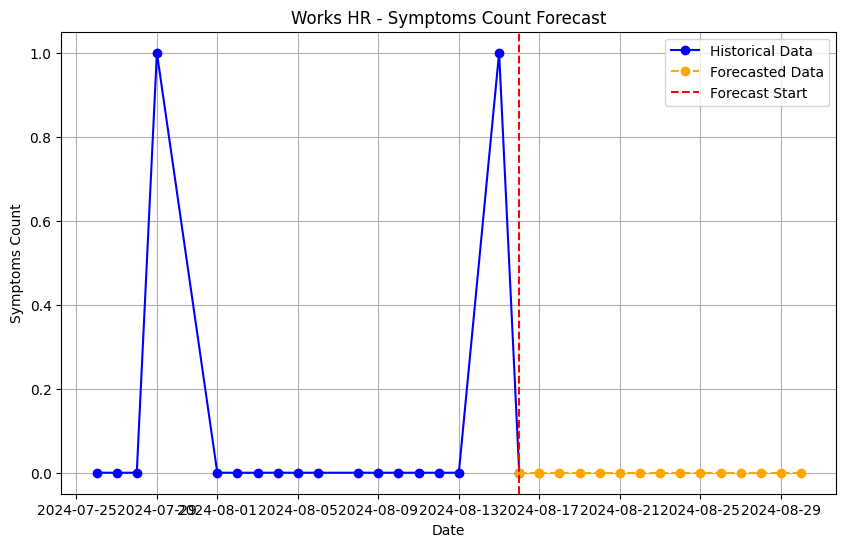

Works HR - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

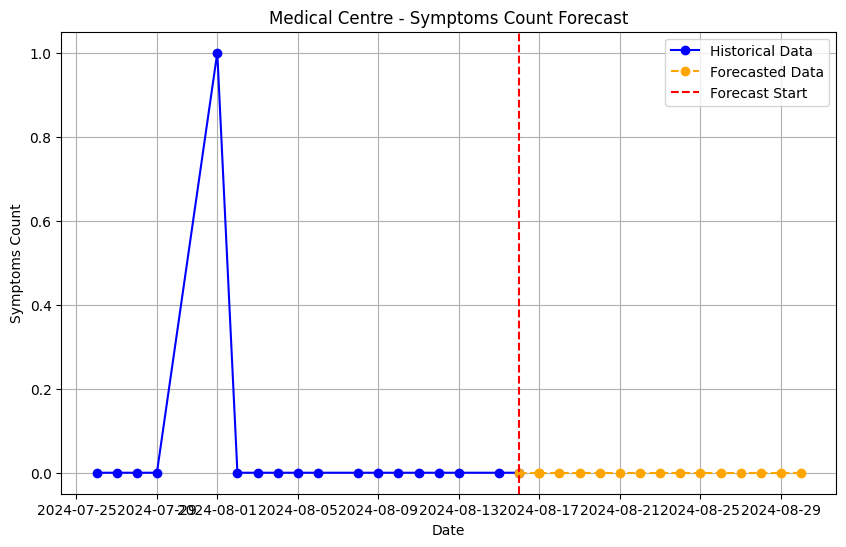

Medical Centre - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

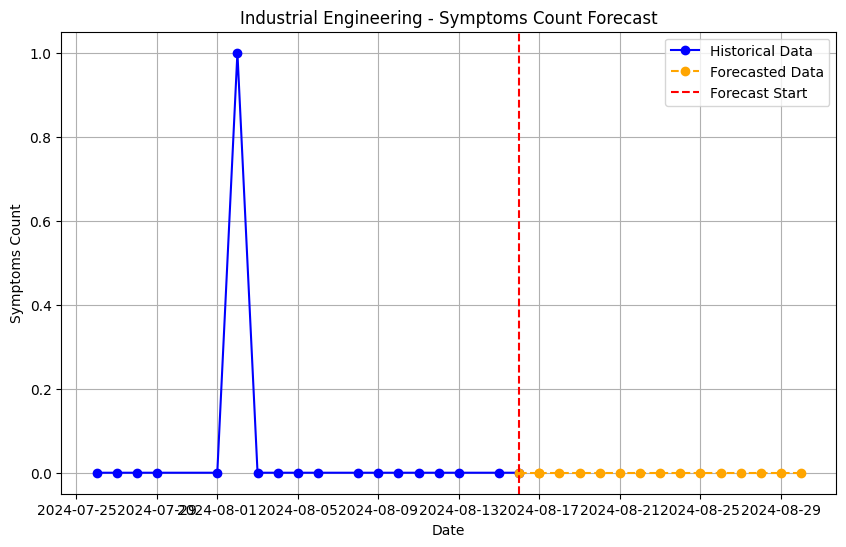

Industrial Engineering - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

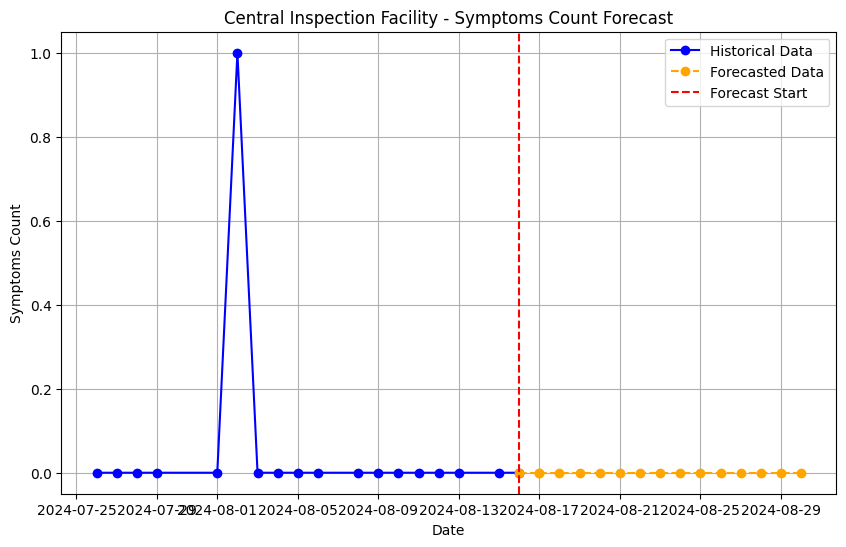

Central Inspection Facility - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

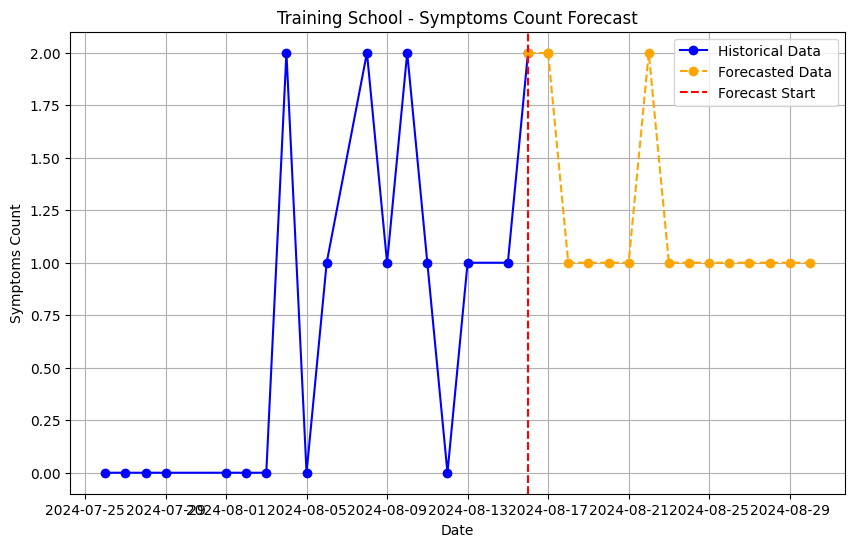

Training School - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:
18    2.0
19    1.0
20    1.0
21    1.0
22    1.0
23    2.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

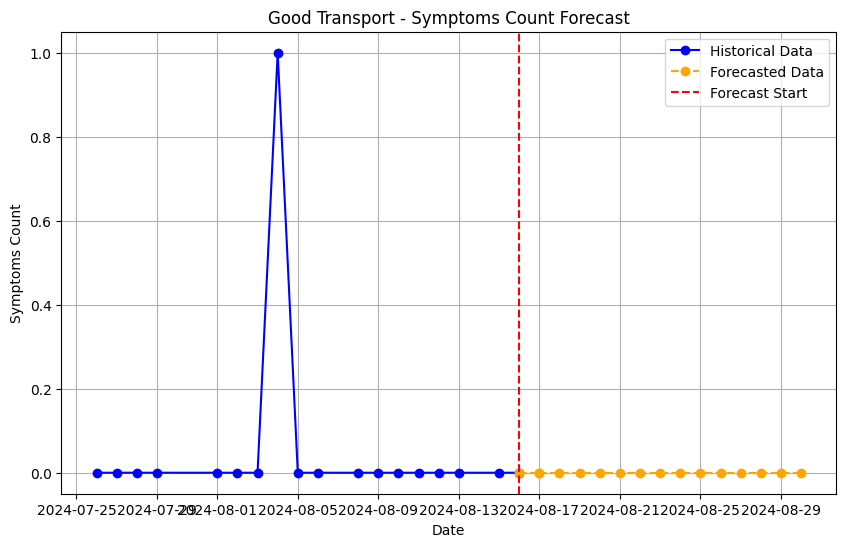

Good Transport - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:
18   -0.0
19   -0.0
20   -0.0
21   -0.0
22   -0.0
23   -0.0
24   -0.0
25   -0.0
26   -0.0
27   -0.0
28   -0.0
29   -0.0
30   -0.0
31   -0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

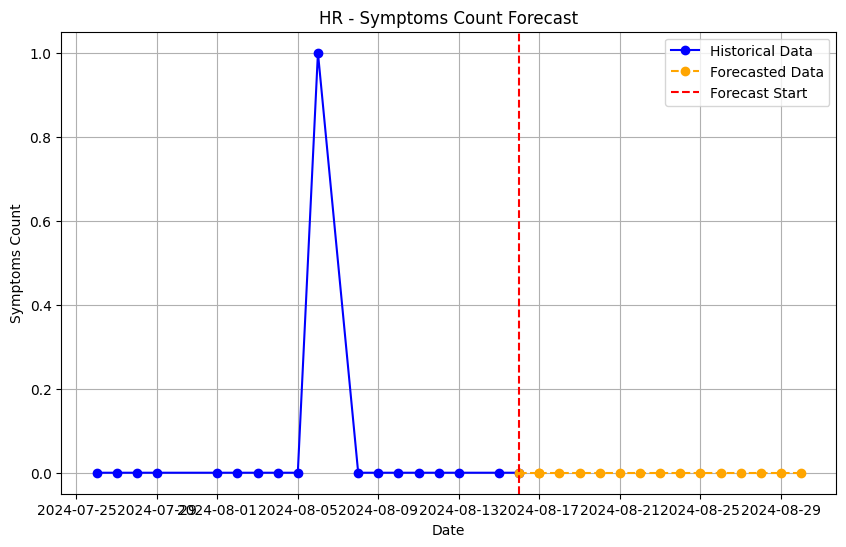

HR - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:
18   -0.0
19   -0.0
20   -0.0
21   -0.0
22   -0.0
23   -0.0
24   -0.0
25   -0.0
26   -0.0
27   -0.0
28   -0.0
29   -0.0
30   -0.0
31   -0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

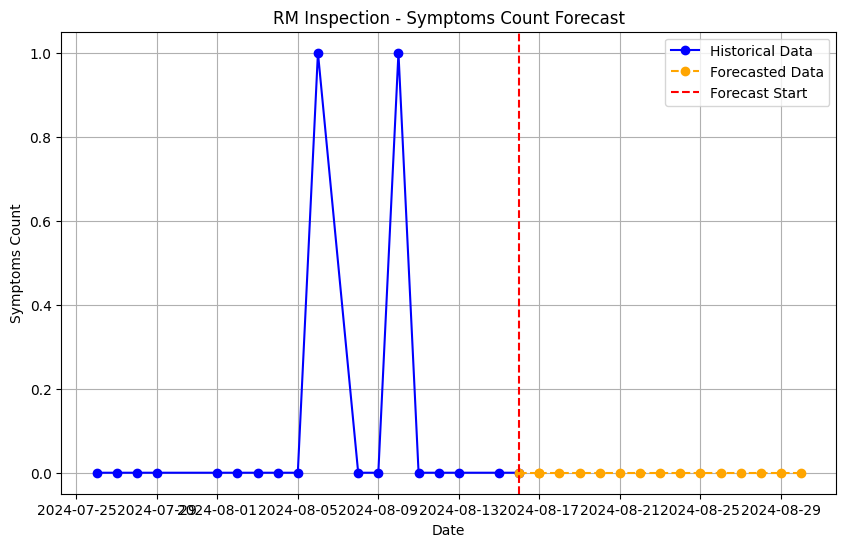

RM Inspection - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:
18   -0.0
19   -0.0
20   -0.0
21   -0.0
22   -0.0
23   -0.0
24   -0.0
25   -0.0
26   -0.0
27   -0.0
28   -0.0
29   -0.0
30   -0.0
31   -0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

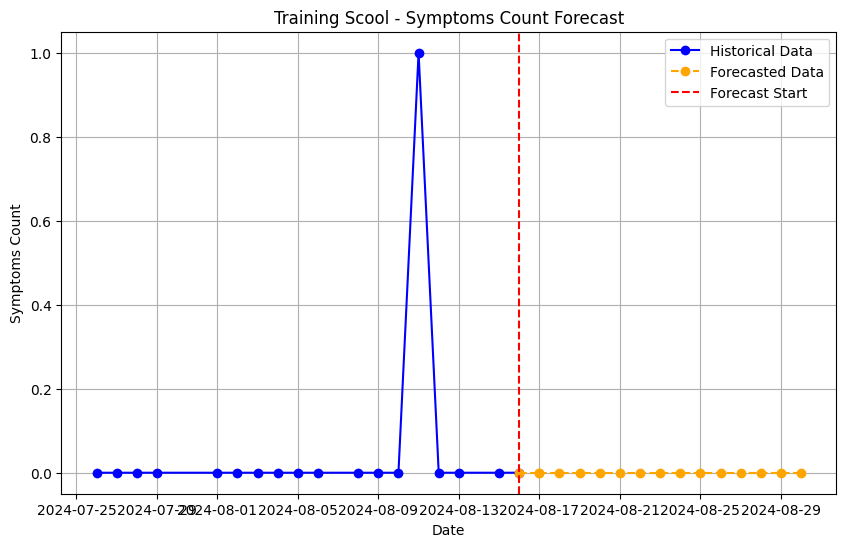

Training Scool - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

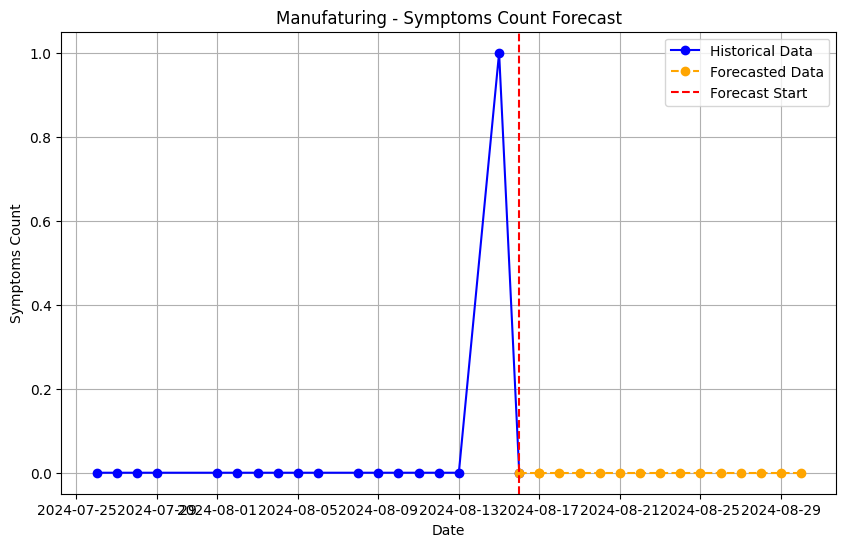

Manufaturing - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
Name: predicted_mean, dtype: float64


In [66]:
# Forecast for each department
for dept in departments:
    # Filter data for the current department
    dept_data = symptom_counts_pivot[dept].astype(int)

    # Fit the ARIMA model
    model = ARIMA(dept_data, order=(5, 1, 0))
    model_fit = model.fit()

    # Forecast for the next 5 days
    forecast = model_fit.forecast(steps=14).round()

    # Create a DataFrame for the forecast
    future_dates = pd.date_range(start='2024-08-17', periods=14, freq='D')
    forecast_series = pd.Series(forecast, index=future_dates, name='Forecasted Symptoms Count')

    dept_data = pd.DataFrame(dept_data)
    dept_data.reset_index(inplace=True)
    dept_data.set_index('Date', inplace=True)
    dept_data.index = pd.to_datetime(dept_data.index)
    forecast_series = pd.Series(forecast, index=future_dates, name='Symptoms Count')
    # Combine historical data with forecast data
    combined = pd.concat([dept_data, forecast_series])

    # Plot
    plt.figure(figsize=(10, 6))

    # Plot historical data
    plt.plot(dept_data.index, dept_data, label='Historical Data', marker='o', color='blue')

    # Plot forecast data
    plt.plot(forecast_series.index, forecast, label='Forecasted Data', marker='o', linestyle='--', color='orange')

      # Draw a line connecting the last point of historical data to the first point of forecast data
    plt.plot(
        [dept_data.index[-1], forecast_series.index[0]],
        [dept_data.iloc[-1, 0], forecast.iloc[0]],
        color='orange', linestyle='--', marker='o',
    )
    # Add a vertical line to indicate the start of forecast
    plt.axvline(x=dept_data.index[-1], color='r', linestyle='--', label='Forecast Start')

    # Format x-axis as dates
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    plt.legend()
    plt.title(f'{dept} - Symptoms Count Forecast')
    plt.xlabel('Date')
    plt.ylabel('Symptoms Count')
    plt.grid(True)

    # Show plot in notebook environment
    plt.show()

    # Save the plot as an image file
    plt.savefig(f'{dept}_Symptoms_Forecast.png')
    plt.close()

    # Display the forecast
    print(f"{dept} - Predicted Symptoms Count for 2 weeks from 08-17 to 08-31:")
    print(forecast)



In [67]:
today_date = datetime.now().date()
last_date = symptom_counts_pivot.index.max().date()
if today_date > last_date:
    missing_days = (today_date - last_date).days
    # Forecast the missing days
    for dept in departments:
        dept_data = symptom_counts_pivot[dept].fillna(method='ffill').astype(int)
        model = ARIMA(dept_data, order=(5, 1, 0))
        model_fit = model.fit()

        # Forecast the missing days
        missing_forecast = model_fit.forecast(steps=missing_days).round()
        missing_dates = pd.date_range(start=last_date + timedelta(days=1), periods=missing_days, freq='D')

        # Add missing forecast to the original data
        for i, date in enumerate(missing_dates):
           symptom_counts_pivot.at[date, dept] = missing_forecast.iloc[i]

<ipython-input-67-f564ee8c70e0>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dept_data = symptom_counts_pivot[dept].fillna(method='ffill').astype(int)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/l

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

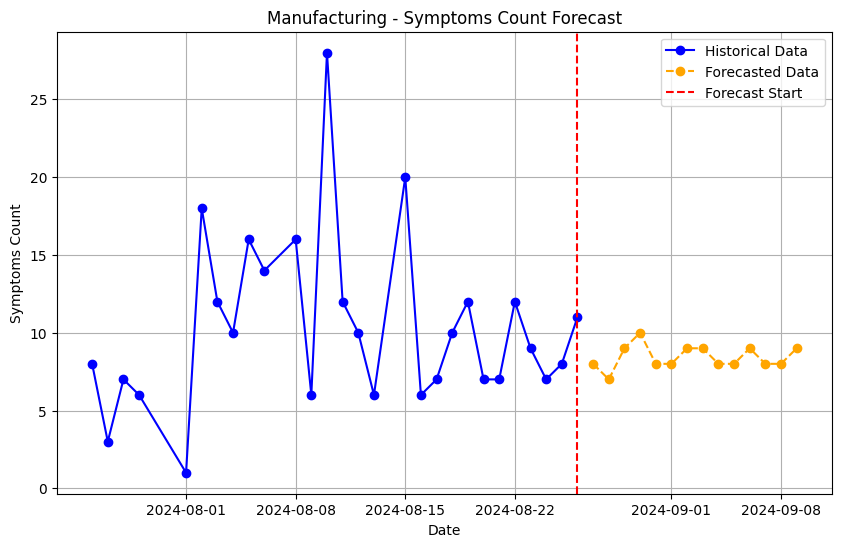

Manufacturing - Predicted Symptoms Count for 2024-08-26 to 2024-09-09:
28     8.0
29     7.0
30     9.0
31    10.0
32     8.0
33     8.0
34     9.0
35     9.0
36     8.0
37     8.0
38     9.0
39     8.0
40     8.0
41     9.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

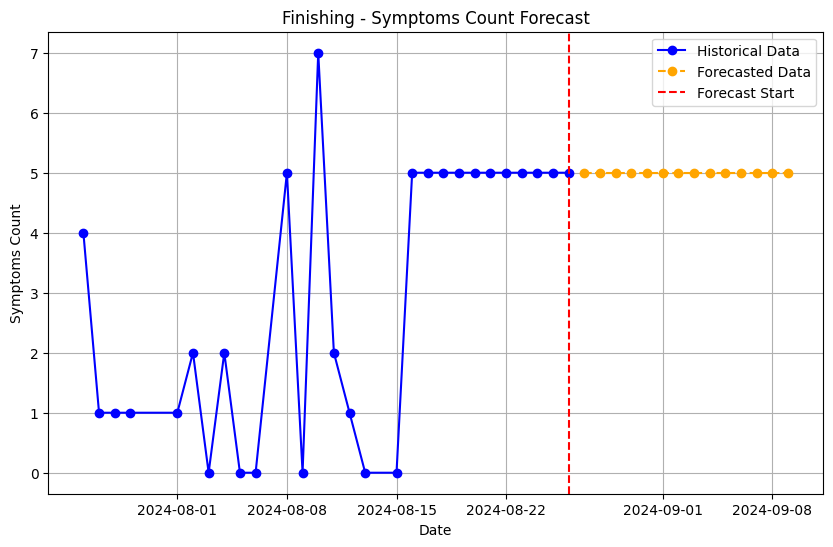

Finishing - Predicted Symptoms Count for 2024-08-26 to 2024-09-09:
28    5.0
29    5.0
30    5.0
31    5.0
32    5.0
33    5.0
34    5.0
35    5.0
36    5.0
37    5.0
38    5.0
39    5.0
40    5.0
41    5.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

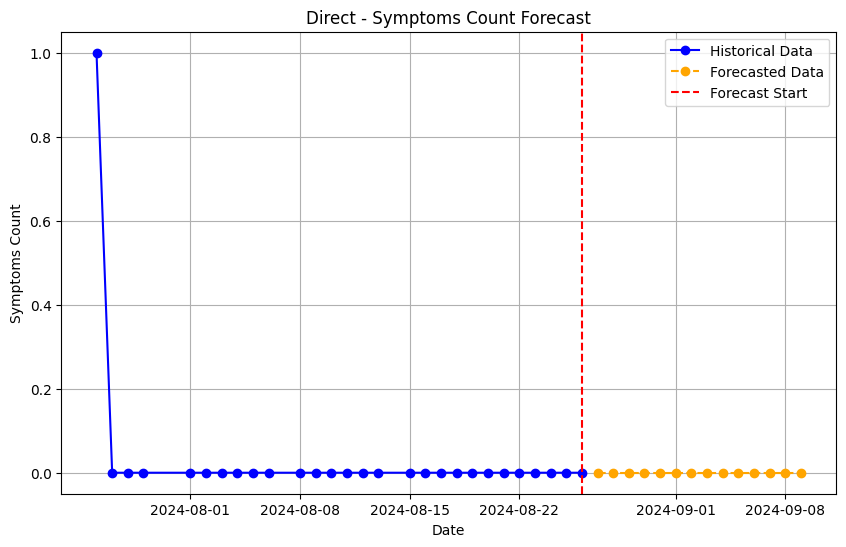

Direct - Predicted Symptoms Count for 2024-08-26 to 2024-09-09:
28   -0.0
29   -0.0
30   -0.0
31   -0.0
32   -0.0
33   -0.0
34   -0.0
35   -0.0
36   -0.0
37   -0.0
38   -0.0
39   -0.0
40   -0.0
41   -0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

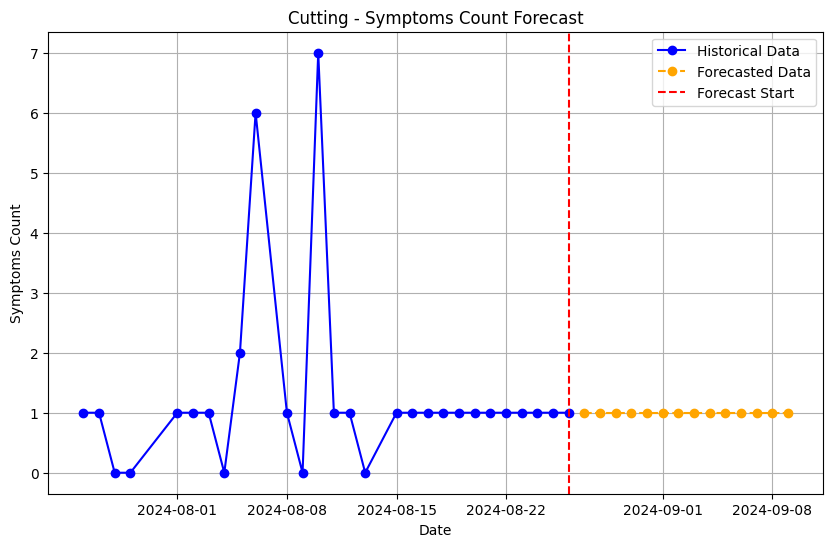

Cutting - Predicted Symptoms Count for 2024-08-26 to 2024-09-09:
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39    1.0
40    1.0
41    1.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

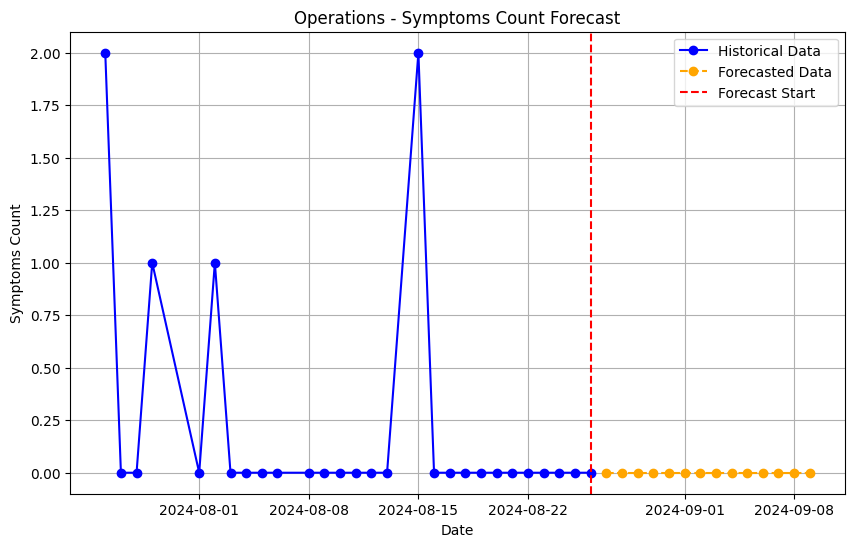

Operations - Predicted Symptoms Count for 2024-08-26 to 2024-09-09:
28   -0.0
29   -0.0
30   -0.0
31   -0.0
32   -0.0
33   -0.0
34   -0.0
35   -0.0
36   -0.0
37   -0.0
38   -0.0
39   -0.0
40   -0.0
41   -0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

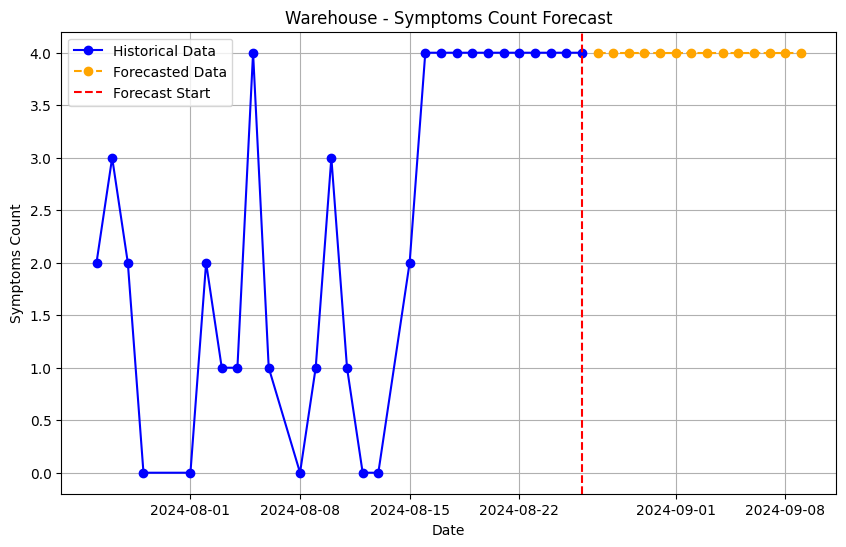

Warehouse - Predicted Symptoms Count for 2024-08-26 to 2024-09-09:
28    4.0
29    4.0
30    4.0
31    4.0
32    4.0
33    4.0
34    4.0
35    4.0
36    4.0
37    4.0
38    4.0
39    4.0
40    4.0
41    4.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

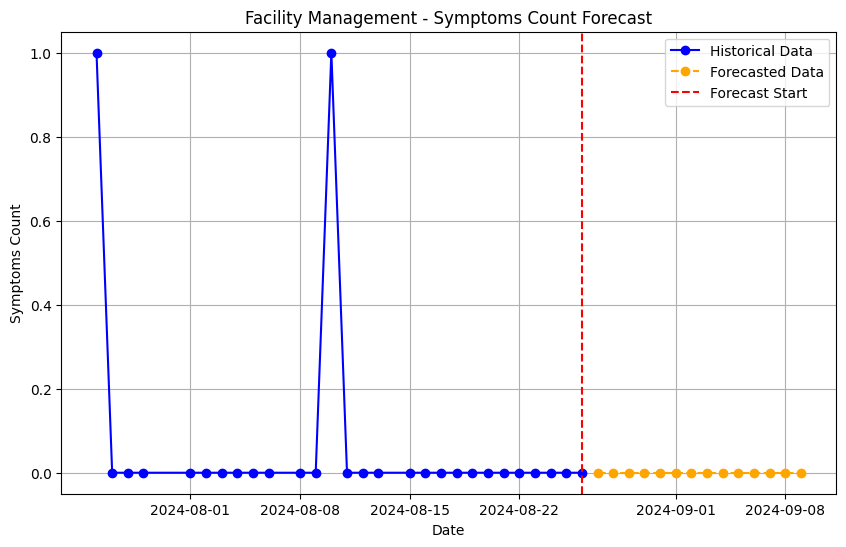

Facility Management - Predicted Symptoms Count for 2024-08-26 to 2024-09-09:
28   -0.0
29   -0.0
30   -0.0
31   -0.0
32   -0.0
33   -0.0
34   -0.0
35   -0.0
36   -0.0
37   -0.0
38   -0.0
39   -0.0
40   -0.0
41   -0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

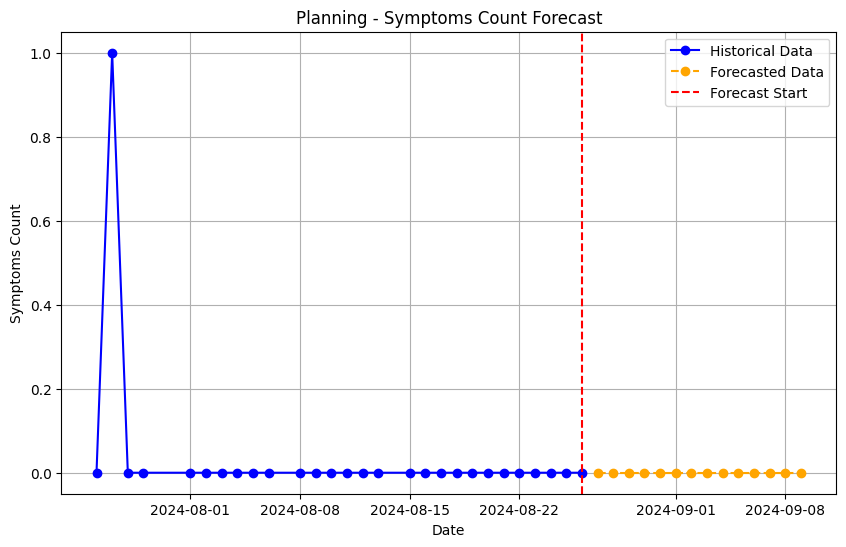

Planning - Predicted Symptoms Count for 2024-08-26 to 2024-09-09:
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

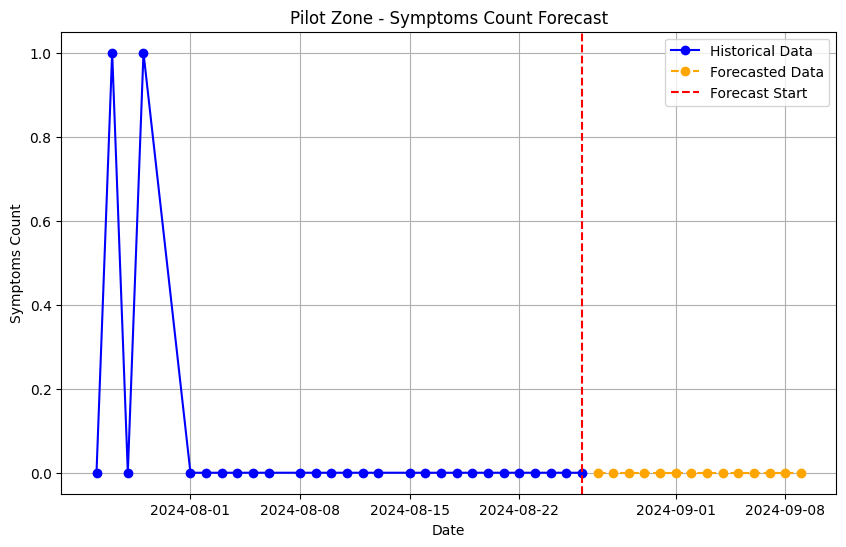

Pilot Zone - Predicted Symptoms Count for 2024-08-26 to 2024-09-09:
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

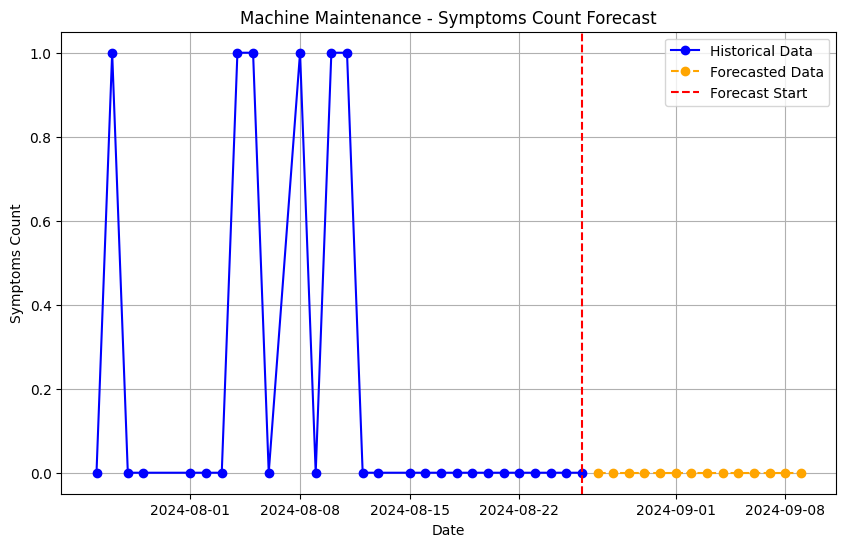

Machine Maintenance - Predicted Symptoms Count for 2024-08-26 to 2024-09-09:
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

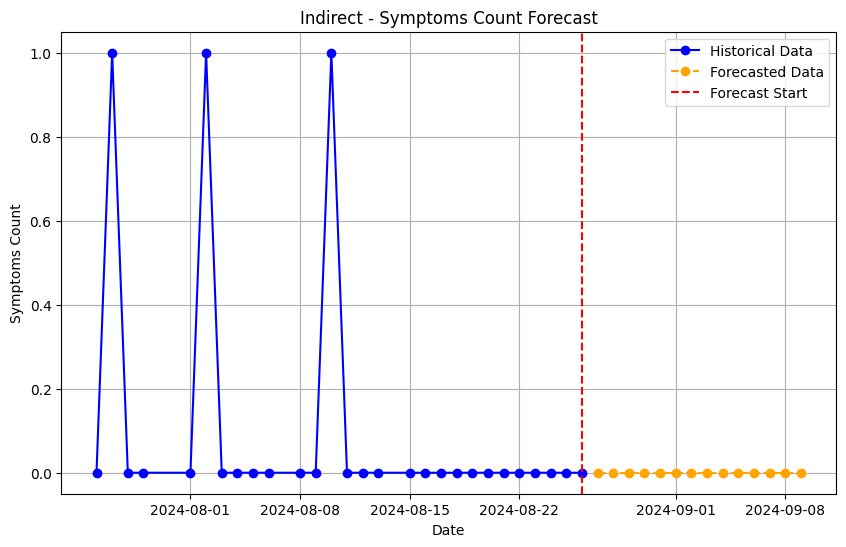

Indirect - Predicted Symptoms Count for 2024-08-26 to 2024-09-09:
28   -0.0
29    0.0
30    0.0
31   -0.0
32   -0.0
33    0.0
34   -0.0
35   -0.0
36   -0.0
37    0.0
38   -0.0
39   -0.0
40   -0.0
41   -0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

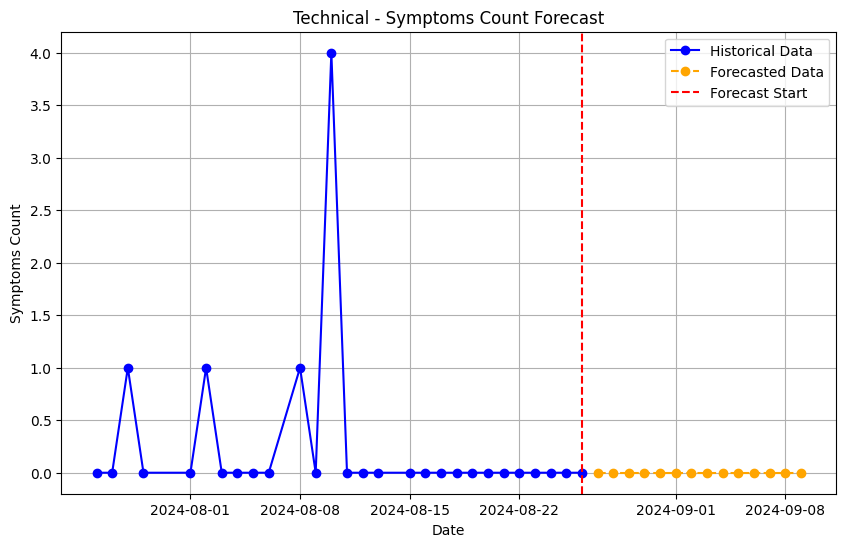

Technical - Predicted Symptoms Count for 2024-08-26 to 2024-09-09:
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

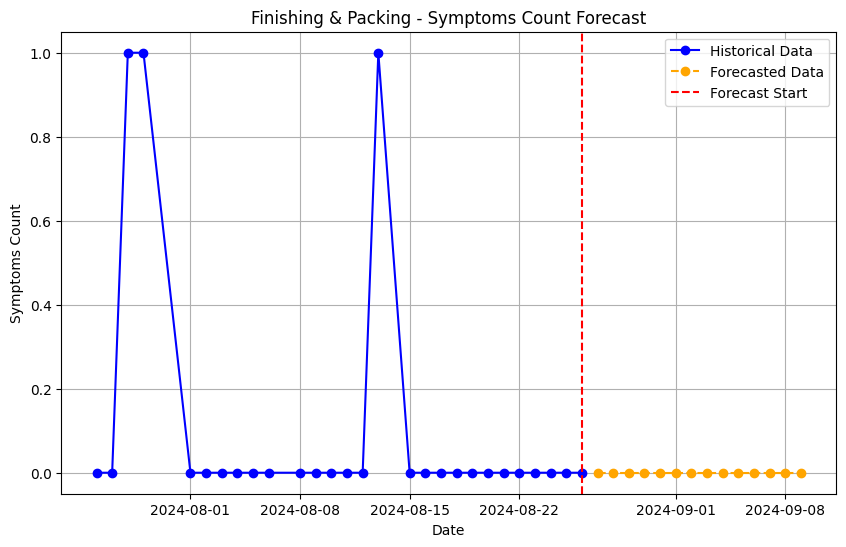

Finishing & Packing - Predicted Symptoms Count for 2024-08-26 to 2024-09-09:
28   -0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

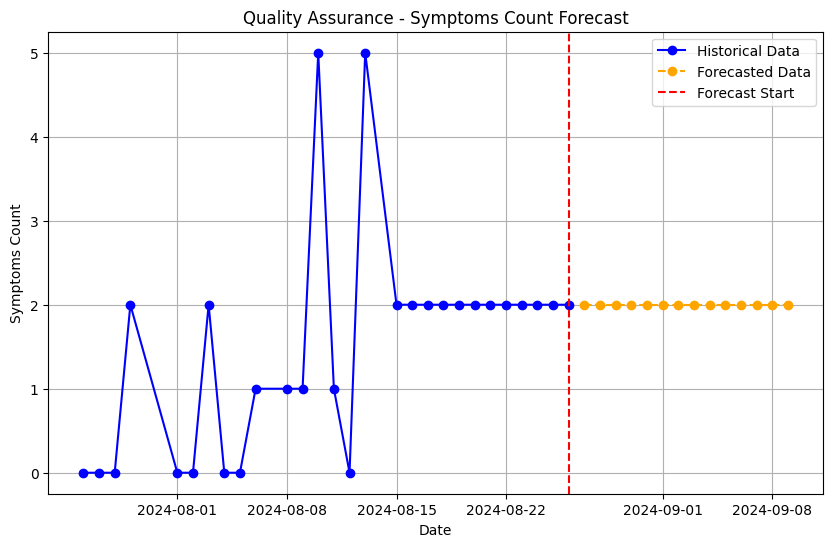

Quality Assurance - Predicted Symptoms Count for 2024-08-26 to 2024-09-09:
28    2.0
29    2.0
30    2.0
31    2.0
32    2.0
33    2.0
34    2.0
35    2.0
36    2.0
37    2.0
38    2.0
39    2.0
40    2.0
41    2.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

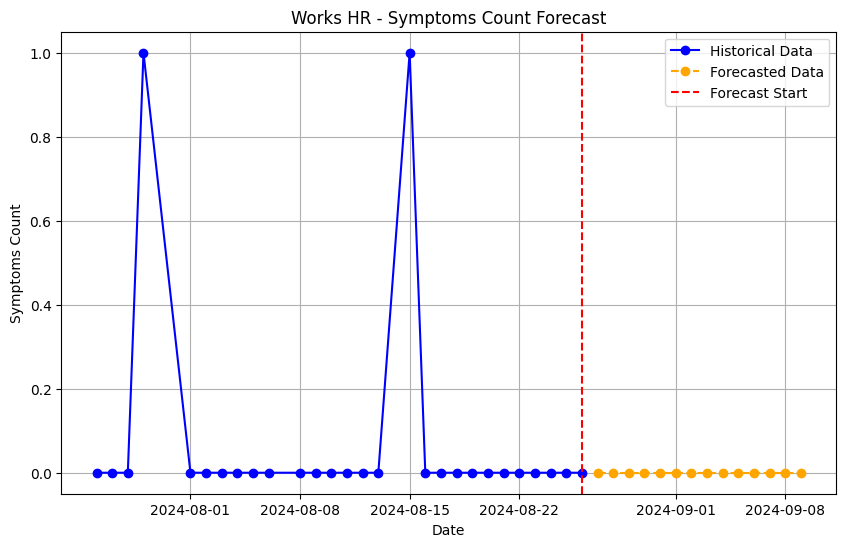

Works HR - Predicted Symptoms Count for 2024-08-26 to 2024-09-09:
28   -0.0
29   -0.0
30   -0.0
31   -0.0
32   -0.0
33   -0.0
34   -0.0
35   -0.0
36   -0.0
37   -0.0
38   -0.0
39   -0.0
40   -0.0
41   -0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

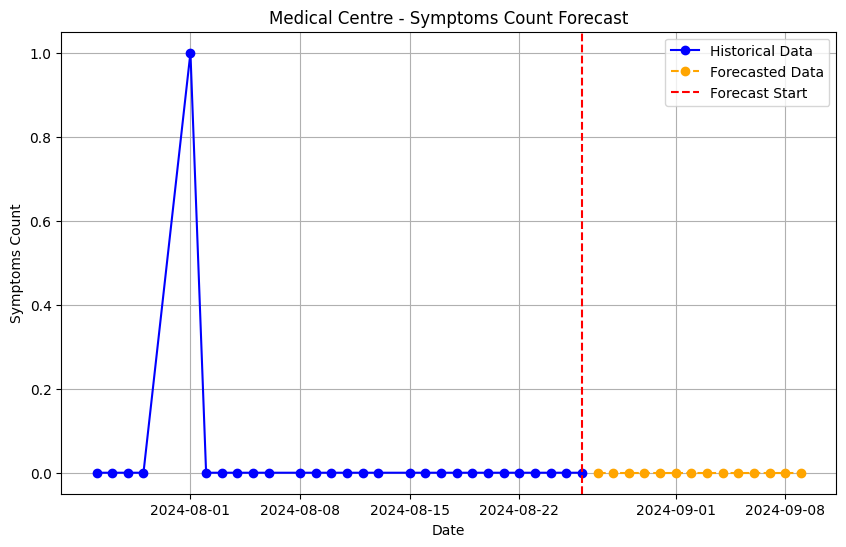

Medical Centre - Predicted Symptoms Count for 2024-08-26 to 2024-09-09:
28   -0.0
29   -0.0
30   -0.0
31   -0.0
32   -0.0
33   -0.0
34   -0.0
35   -0.0
36   -0.0
37   -0.0
38   -0.0
39   -0.0
40   -0.0
41   -0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

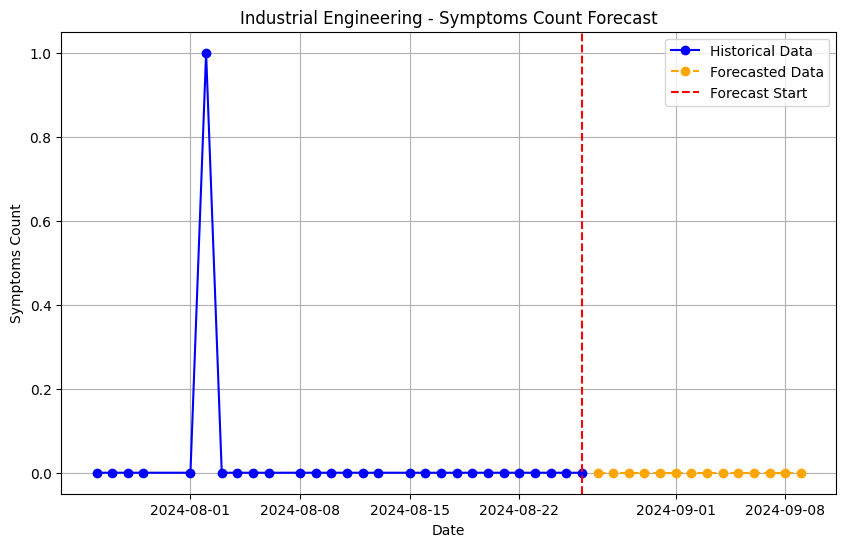

Industrial Engineering - Predicted Symptoms Count for 2024-08-26 to 2024-09-09:
28   -0.0
29   -0.0
30   -0.0
31   -0.0
32   -0.0
33   -0.0
34   -0.0
35   -0.0
36   -0.0
37   -0.0
38   -0.0
39   -0.0
40   -0.0
41   -0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

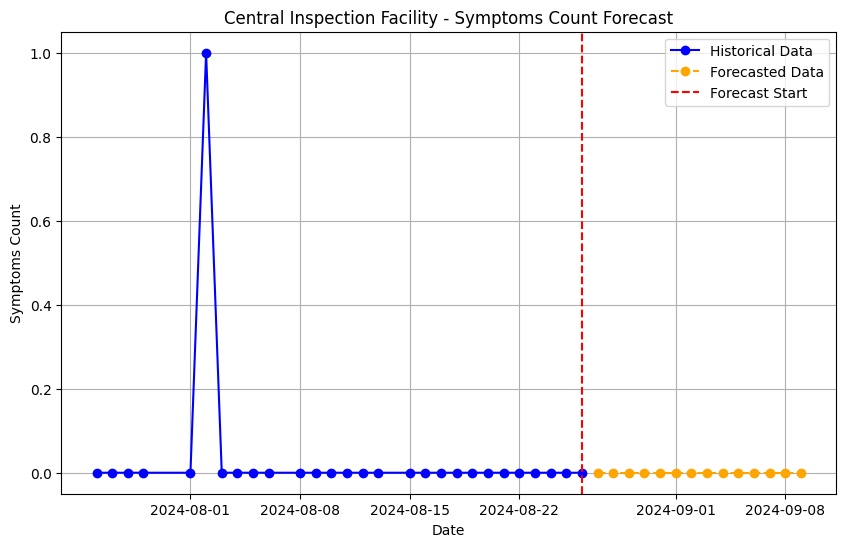

Central Inspection Facility - Predicted Symptoms Count for 2024-08-26 to 2024-09-09:
28   -0.0
29   -0.0
30   -0.0
31   -0.0
32   -0.0
33   -0.0
34   -0.0
35   -0.0
36   -0.0
37   -0.0
38   -0.0
39   -0.0
40   -0.0
41   -0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

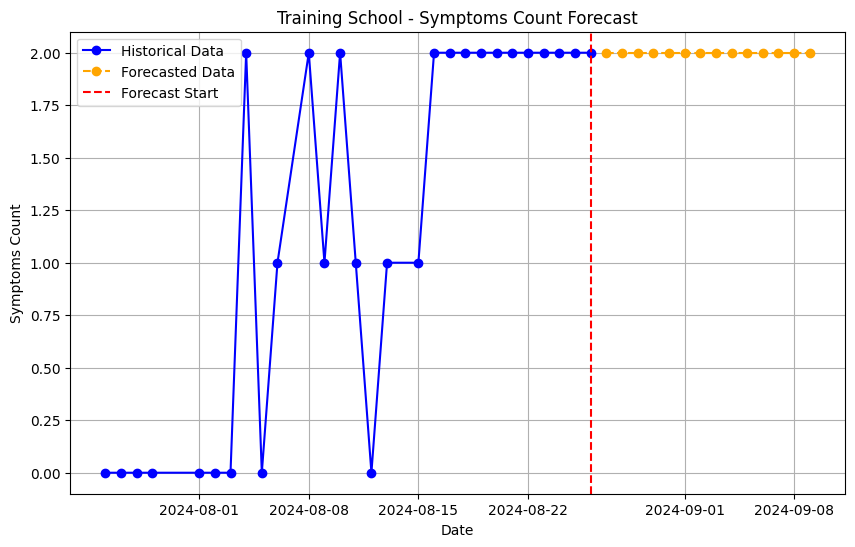

Training School - Predicted Symptoms Count for 2024-08-26 to 2024-09-09:
28    2.0
29    2.0
30    2.0
31    2.0
32    2.0
33    2.0
34    2.0
35    2.0
36    2.0
37    2.0
38    2.0
39    2.0
40    2.0
41    2.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

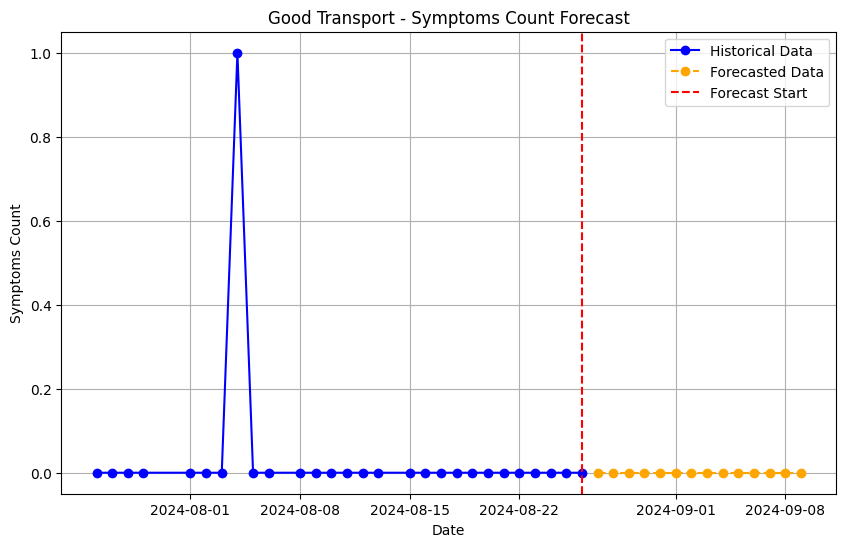

Good Transport - Predicted Symptoms Count for 2024-08-26 to 2024-09-09:
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

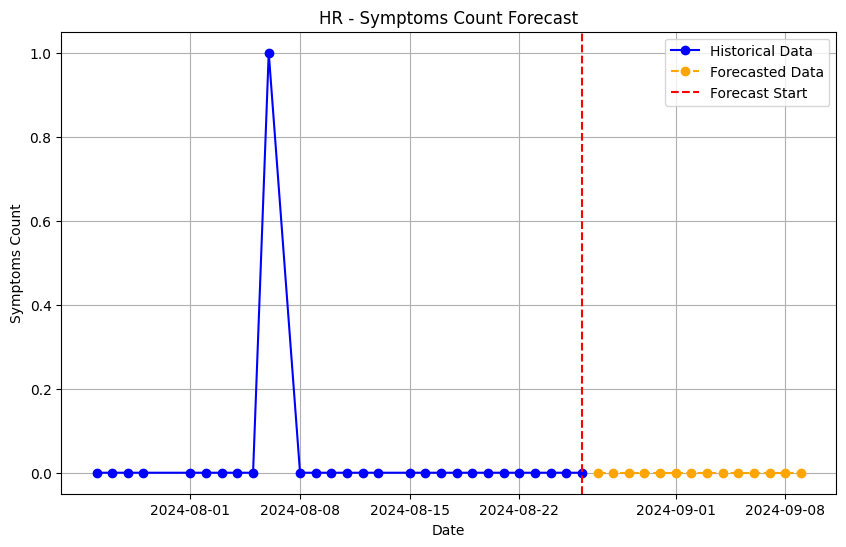

HR - Predicted Symptoms Count for 2024-08-26 to 2024-09-09:
28   -0.0
29   -0.0
30   -0.0
31   -0.0
32   -0.0
33   -0.0
34   -0.0
35   -0.0
36   -0.0
37   -0.0
38   -0.0
39   -0.0
40   -0.0
41   -0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

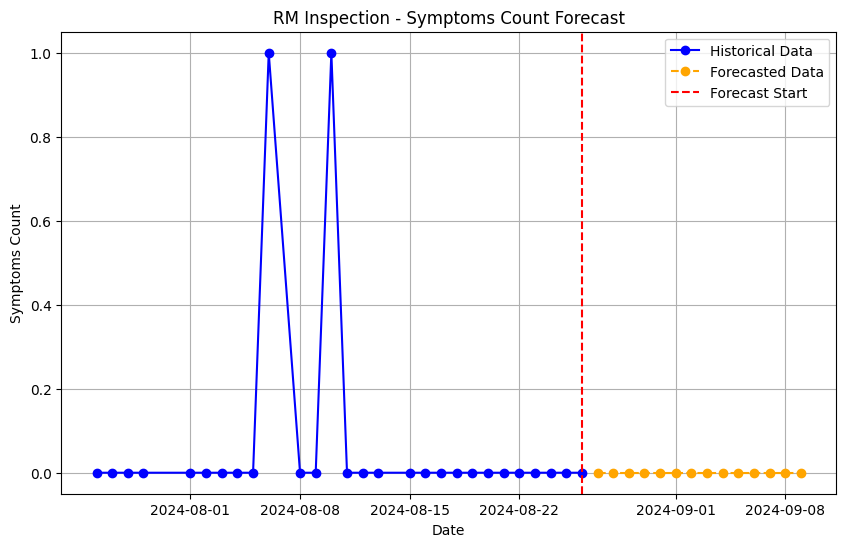

RM Inspection - Predicted Symptoms Count for 2024-08-26 to 2024-09-09:
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

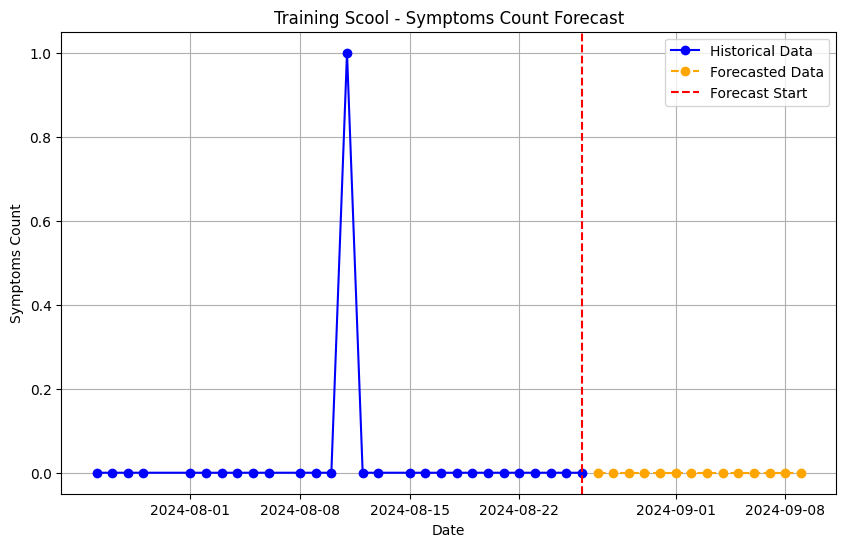

Training Scool - Predicted Symptoms Count for 2024-08-26 to 2024-09-09:
28   -0.0
29   -0.0
30   -0.0
31   -0.0
32   -0.0
33   -0.0
34   -0.0
35   -0.0
36   -0.0
37   -0.0
38   -0.0
39   -0.0
40   -0.0
41   -0.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

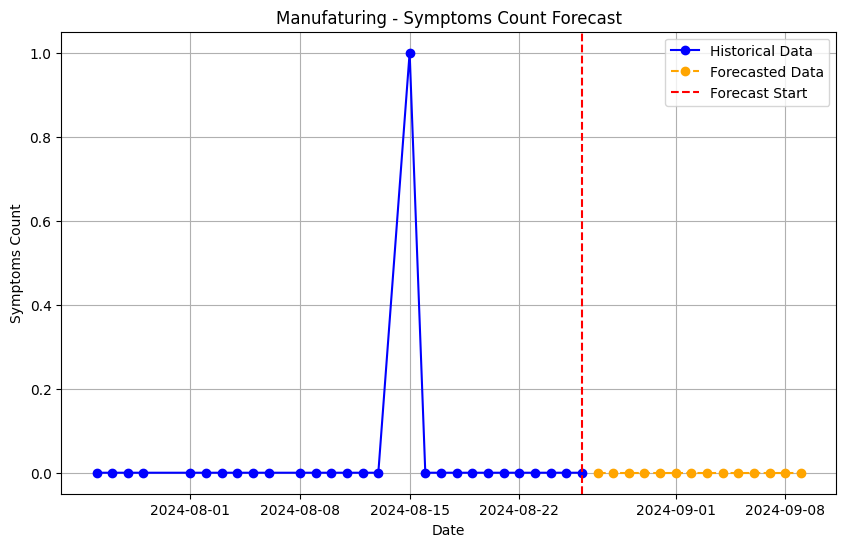

Manufaturing - Predicted Symptoms Count for 2024-08-26 to 2024-09-09:
28   -0.0
29   -0.0
30   -0.0
31   -0.0
32   -0.0
33   -0.0
34   -0.0
35   -0.0
36   -0.0
37   -0.0
38   -0.0
39   -0.0
40   -0.0
41   -0.0
Name: predicted_mean, dtype: float64


In [68]:
# Now forecast for the next 14 days from today
for dept in departments:
    dept_data = symptom_counts_pivot[dept].astype(int)
    model = ARIMA(dept_data, order=(5, 1, 0))
    model_fit = model.fit()

    # Forecast for the next 14 days
    forecast = model_fit.forecast(steps=14).round()
    future_dates = pd.date_range(start=today_date + timedelta(days=1), periods=14, freq='D')
    forecast_series = pd.Series(forecast, index=future_dates, name='Forecasted Symptoms Count')

    # Combine historical data with forecast data
    combined = pd.concat([dept_data, forecast_series])

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(dept_data.index, dept_data, label='Historical Data', marker='o', color='blue')
    plt.plot(forecast_series.index, forecast, label='Forecasted Data', marker='o', linestyle='--', color='orange')

    # Add a vertical line to indicate the start of forecast
    plt.axvline(x=dept_data.index[-1], color='r', linestyle='--', label='Forecast Start')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.title(f'{dept} - Symptoms Count Forecast')
    plt.xlabel('Date')
    plt.ylabel('Symptoms Count')
    plt.grid(True)
    plt.show()

    # Save the plot as an image file
    plt.savefig(f'{dept}_Symptoms_Forecast.png')
    plt.close()

    # Display the forecast
    print(f"{dept} - Predicted Symptoms Count for {today_date.strftime('%Y-%m-%d')} to {(today_date + timedelta(days=14)).strftime('%Y-%m-%d')}:")
    print(forecast)

In [ ]:
dept_data.index[-1]

In [ ]:
forecast_series.index[0]

In [ ]:
dept_data.iloc[-1, 0]

In [ ]:
forecast.iloc[0]

In [ ]:
forecast_series

In [ ]:
forecast

In [ ]:
#     # Combine historical data with forecast data
# combined = pd.concat([dept_data, forecast_series])

#     # Plot
# plt.figure(figsize=(10, 6))

#     # Plot historical data
# plt.plot(dept_data.index, dept_data, label='Historical Data', marker='o')

#     # Plot forecast data
# plt.plot(forecast_series.index, forecast_series, label='Forecasted Data', marker='o', linestyle='--')

#     # Add a vertical line to indicate the start of forecast
# plt.axvline(x=dept_data.index[-1], color='r', linestyle='--', label='Forecast Start')

#     # Format x-axis as dates
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# plt.legend()
# plt.title(f'{dept} - Symptoms Count Forecast')
# plt.xlabel('Date')
# plt.ylabel('Symptoms Count')
# plt.grid(True)

#     # Show plot in notebook environment
# plt.show()

#     # Save the plot as an image file
# plt.savefig(f'{dept}_Symptoms_Forecast.png')
# plt.close()

#     # Display the forecast
# print(f"{dept} - Predicted Symptoms Count for 08-15 to 08-19:")
# print(forecast)